In [1]:
import numpy as np
import pygmt
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
background_cat = pd.read_csv('./background_cat.csv')

In [3]:
cmt_small = pd.read_csv('./cmt_cat_small.csv')
cmt_large = pd.read_csv('./cmt_cat_large.csv')

In [7]:
cat = pd.read_csv('./cat.csv')

In [ ]:
back_projection = pd.read_csv('./back_projection.csv')
pygmt.makecpt(cmap='hot', series=[0, 15, 0.1], continuous=True, output='back_projection.cpt')

plot [WARNING]: Length <unit> d not supported - revert to default unit [cm]
plot [WARNING]:  not a valid number and may not be decoded properly.


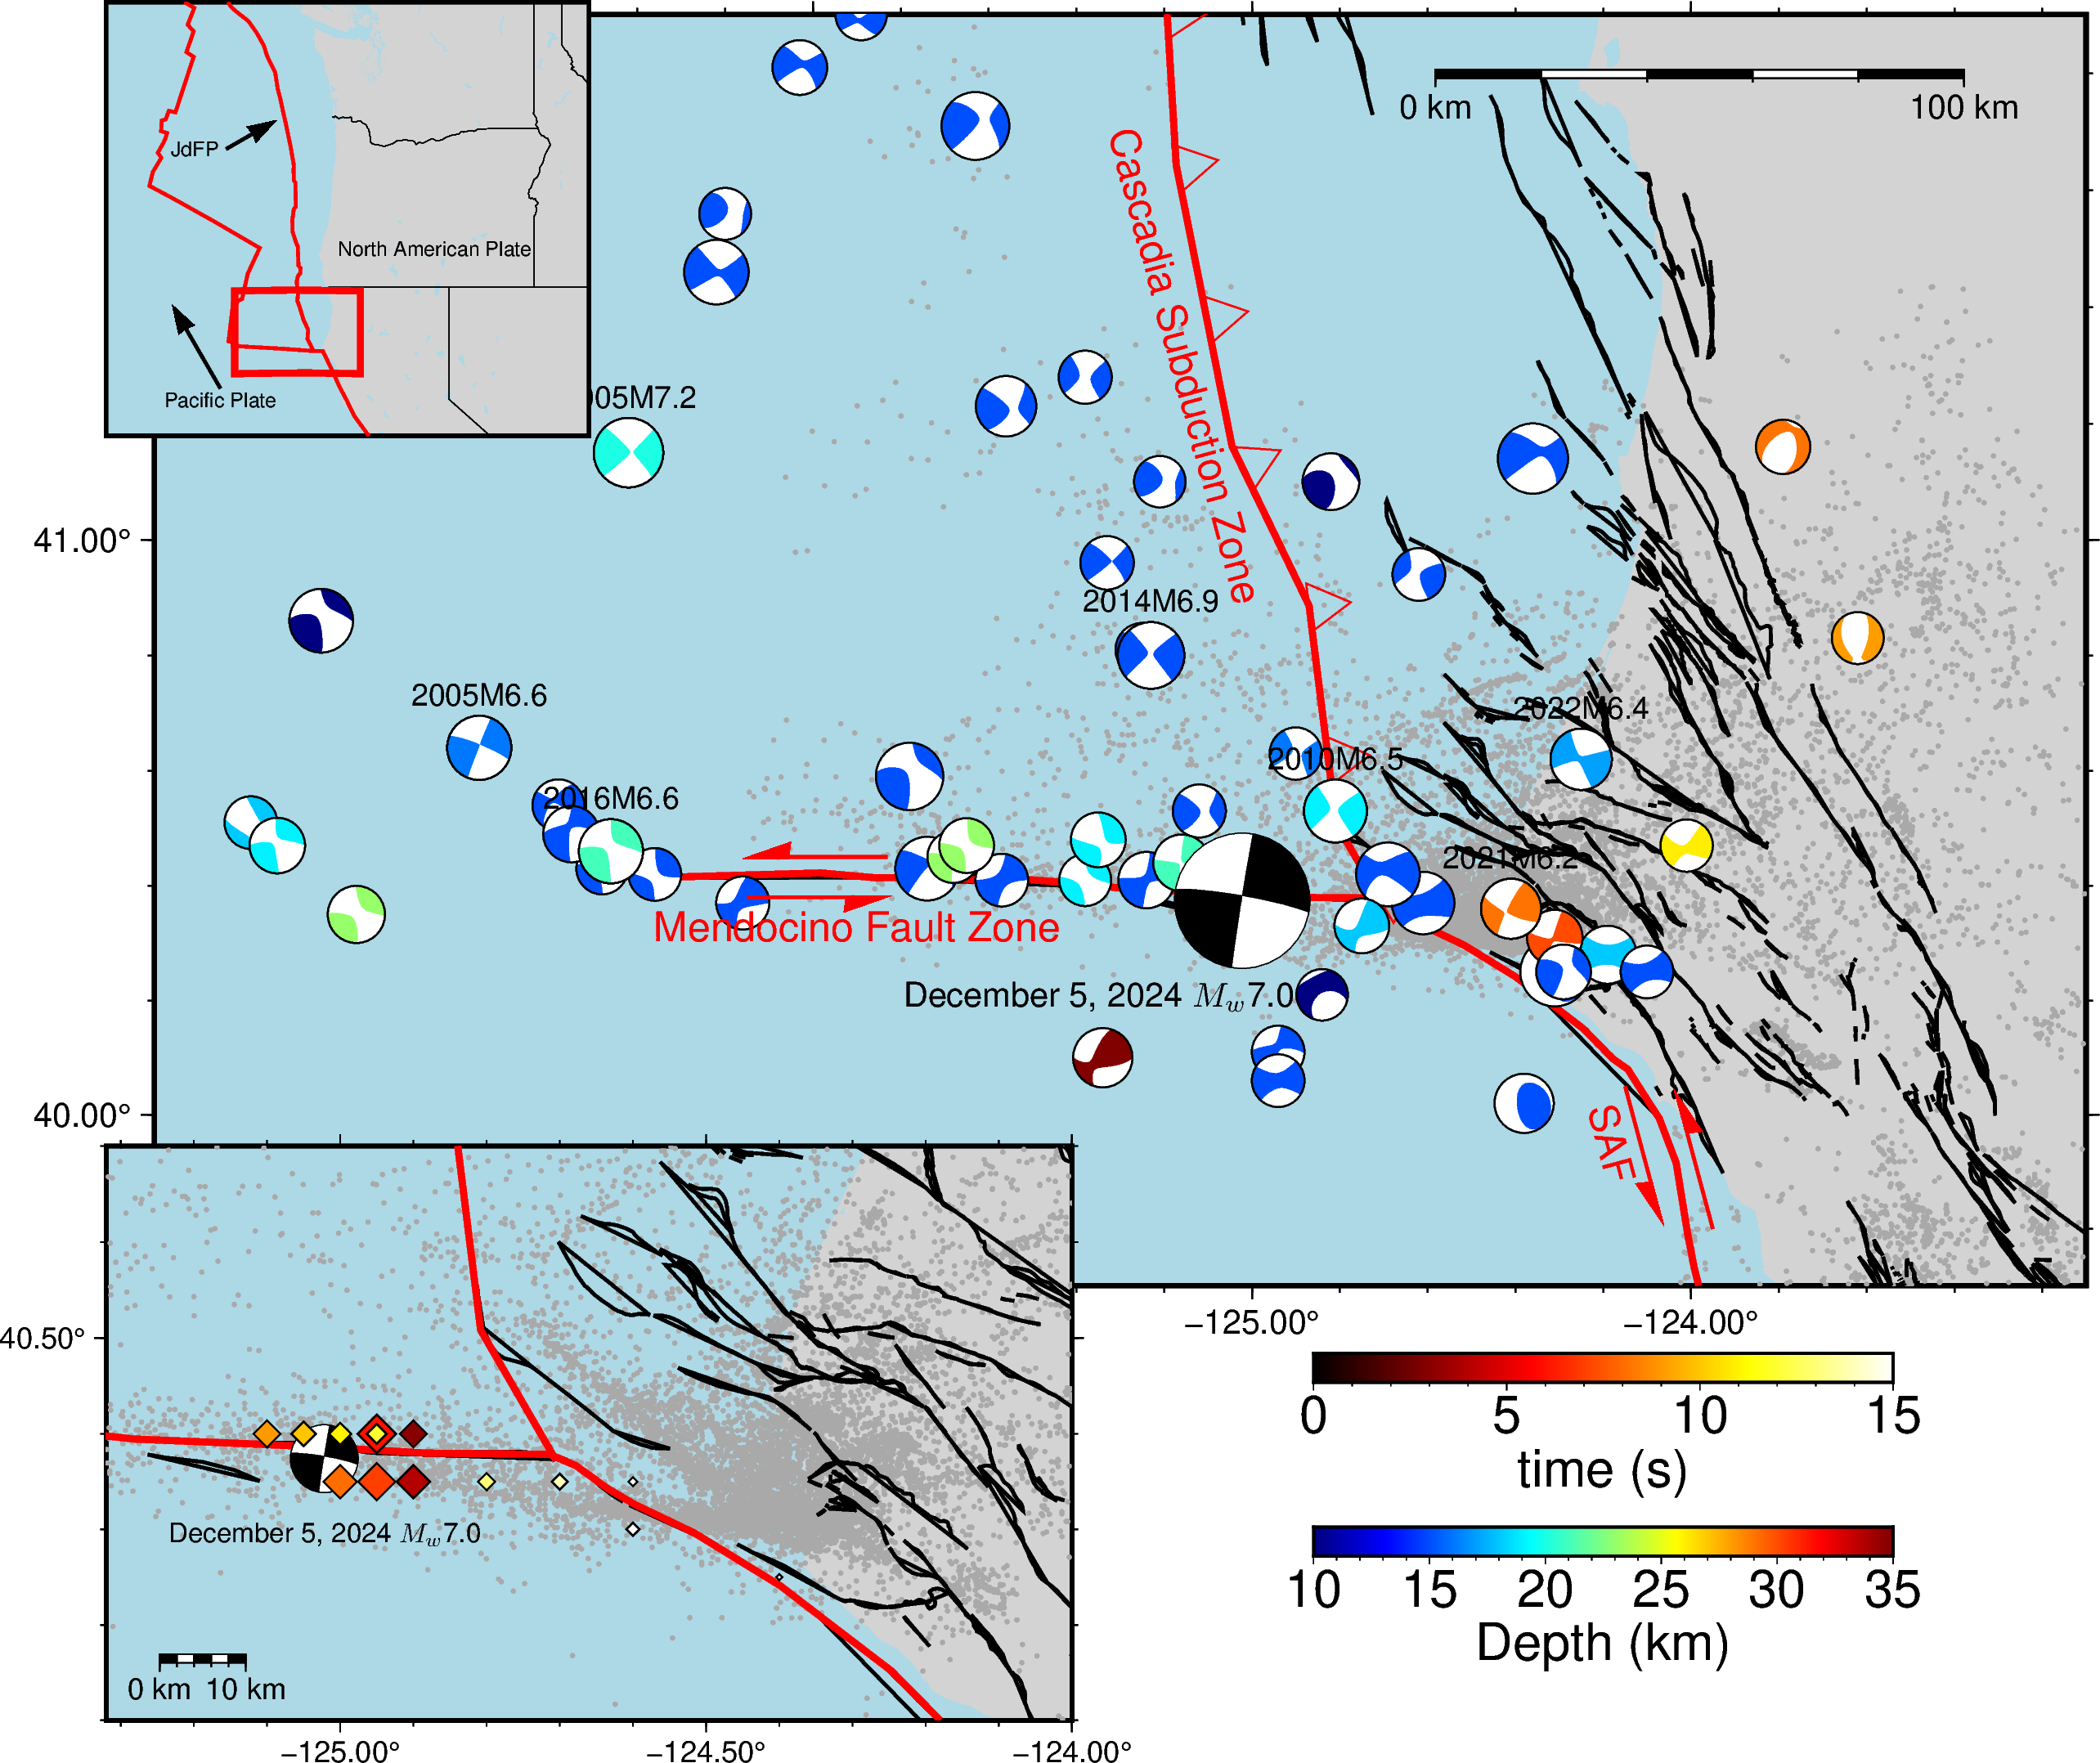

In [37]:

fig = pygmt.Figure()
pygmt.config(FORMAT_GEO_MAP='ddd.xx', MAP_FRAME_TYPE='plain')
region1=[-127.5, -123.1, 39.7, 41.9]
fig.coast(
    frame=['WSne', 'xa1f0.2', 'ya1f0.2'],
    projection=f"M20",
    region=region1,
    land='lightgray',
    water='lightblue'
)
fig.plot(
    x=background_cat.lon,
    y=background_cat.lat,
    style="c0.05c",
    fill="darkgray",
    label='background seismicity'
)

fig.plot(data='./output.gmt', pen='1p,black', close=True)
fig.plot(data='./SAF_Men.gmt', pen='2p,red')
fig.plot(data='./cascedia.gmt', pen='2p,red', style='f1.5c/0.5c+r+t+p0.5p,red')
fig.meca(spec=cmt_small.iloc[:, 3:], longitude=cmt_small.lon, latitude=cmt_small.lat, scale=0.5, pen='0.5p', convention='mt', depth=cmt_small.depth, cmap='cmt.cpt')
fig.meca(spec=cmt_large.iloc[:, 3:], longitude=cmt_large.lon, latitude=cmt_large.lat, scale=0.5, pen='0.5p', convention='mt', depth=cmt_large.depth, cmap='cmt.cpt', event_name=cmt_large.name)
fig.text(x=-125.15, y=41.3, text='Cascadia Subduction Zone', font='12p,red', angle=-75)
fig.text(x=-124.18, y=39.95, text='SAF', font='12p,red', angle=-75)
fig.plot(x=-123.95, y=39.8, style="v0.5c+ea+r+h0.1+a35", direction=([105], [1.5]), pen="1p,red", fill="red")
fig.plot(x=-124.15, y=40.05, style="v0.5c+ea+r+h0.1+a35", direction=([285], [1.5]), pen="1p,red", fill="red")
fig.text(x=-125.9, y=40.33, text='Mendocino Fault Zone', font='12p,red', angle=0)

focal_mechanism = [
    [280, 84, -179, 189, 89, -6, 4.028, 19]  # Single event
]

# Create a DataFrame to pass to pygmt.meca
focal_df = pd.DataFrame(focal_mechanism, columns=["strike1", "dip1", "rake1", "strike2", "dip2", "rake2", "mantissa", "exponent"])

# Event information (longitude, latitude, depth) and location for beachball
event_data = pd.DataFrame({
    "longitude": [-125.022],
    "latitude": [40.374],
    "depth": [10.0]
})

# Add the focal mechanism DataFrame to the event DataFrame
event_data = pd.concat([event_data, focal_df], axis=1)

# Plot the beachball using GCMT convention
fig.meca(spec=event_data, scale="3c", offset=True) 
fig.text(x=-125.35, y=40.374, text='December 5, 2024 @[M_{w}@[7.0', font='10p', angle=0, offset='0/-1c')


fig.plot(x=-126.15, y=40.38, style="v0.5c+ea+r+h0.1+a35", direction=([0], [1.5]), pen="1p,red", fill="red")
fig.plot(x=-125.83, y=40.45, style="v0.5c+ea+r+h0.1+a35", direction=([180], [1.5]), pen="1p,red", fill="red")
fig.basemap(map_scale="n0.8/0.95+w100k+f+u")

##############################################################################################################################################################################################################################################################################
##############################################################################################################################################################################################################################################################################
##############################################################################################################################################################################################################################################################################
##############################################################################################################################################################################################################################################################################
fig.shift_origin(yshift='8.8c', xshift='-0.5c')
region2=[-132, -115.1, 38, 49]
pygmt.config(FORMAT_GEO_MAP='ddd.xx', MAP_FRAME_TYPE='plain')

fig.coast(
    frame=['lrtb'],
    projection=f"M5",
    region=region2,
    land='lightgray',
    water='lightblue',
    borders=2
)
fig.plot(data='./PB2002_boundaries.gmt', pen='1p,red')
fig.text(x=-128.0, y=39.0, text="Pacific Plate", font="6p", angle=0)
fig.plot(x=-128, y=39.3, style="v0.3c+ea+h0.1+a35", direction=([120], [1.0]), pen="1p", fill="black")
fig.text(x=-128.9, y=45.5, text="JdFP", font="6p", angle=0)
fig.plot(x=-127.8, y=45.5, style="v0.3c+ea+h0.1+a35", direction=([30], [0.6]), pen="1p", fill="black")
fig.text(x=-120.5, y=43.0, text="North American Plate", font="6p", angle=0)
fig.plot(x=[region1[0], region1[1], region1[1], region1[0]], y=[region1[2], region1[2], region1[3], region1[3]], pen="2p,red", close=True)
# ##############################################################################################################################################################################################################################################################################
# ##############################################################################################################################################################################################################################################################################
# ##############################################################################################################################################################################################################################################################################
# ##############################################################################################################################################################################################################################################################################
fig.shift_origin(yshift='-13.3c')
region3=[-125.32, -124, 40.1, 40.7]
pygmt.config(FORMAT_GEO_MAP='ddd.xx', MAP_FRAME_TYPE='plain')

fig.coast(
    frame=['WSne', 'xa0.5f0.1', 'ya0.5f0.1'],
    projection=f"M10",
    region=region3,
    land='lightgray',
    water='lightblue'
)


fig.plot(
    x=cat.lon,
    y=cat.lat,
    style="c0.05c",
    fill="darkgray",
    label='Lomax catalog'
)

fig.plot(data='./output.gmt', pen='1p,black', close=True)
fig.plot(data='./SAF_Men.gmt', pen='2p,red')
fig.plot(data='./cascedia.gmt', pen='2p,red')

fig.text(x=-125.15, y=41.3, text='Cascadia Subduction Zone', font='12p,red', angle=-75)
fig.text(x=-124.18, y=39.95, text='SAF', font='12p,red', angle=-75)
fig.plot(x=-123.95, y=39.8, style="v0.5c+ea+r+h0.1+a35", direction=([105], [1.5]), pen="1p,red", fill="red")
fig.plot(x=-124.15, y=40.05, style="v0.5c+ea+r+h0.1+a35", direction=([285], [1.5]), pen="1p,red", fill="red")
fig.text(x=-125.9, y=40.33, text='Mendocino Fault Zone', font='12p,red', angle=0)

focal_mechanism = [
    [280, 84, -179, 189, 89, -6, 4.028, 19]  # Single event
]

# Create a DataFrame to pass to pygmt.meca
focal_df = pd.DataFrame(focal_mechanism, columns=["strike1", "dip1", "rake1", "strike2", "dip2", "rake2", "mantissa", "exponent"])

# Event information (longitude, latitude, depth) and location for beachball
event_data = pd.DataFrame({
    "longitude": [-125.022],
    "latitude": [40.374],
    "depth": [10.0]
})

# Add the focal mechanism DataFrame to the event DataFrame
event_data = pd.concat([event_data, focal_df], axis=1)

# Plot the beachball using GCMT convention
fig.meca(spec=event_data, scale="1.5c", offset=True) 
fig.text(x=-125.022, y=40.345, text='December 5, 2024 @[M_{w}@[7.0', font='8p', angle=0, offset='0/-0.5c')


fig.plot(x=-126.15, y=40.38, style="v0.5c+ea+r+h0.1+a35", direction=([0], [1.5]), pen="1p,red", fill="red")
fig.plot(x=-125.83, y=40.45, style="v0.5c+ea+r+h0.1+a35", direction=([180], [1.5]), pen="1p,red", fill="red")
fig.plot(x=back_projection.lon, y=back_projection.lat, style="dd", size=0.4 * back_projection.beam_power, fill=back_projection.time, cmap='back_projection.cpt', pen='0.5p')
# Add the color bar for depth
with pygmt.config(FONT_LABEL='24p,Helvetica,black', FONT_ANNOT_PRIMARY='24p,Helvetica,black'):
    fig.colorbar(
        cmap='cmt.cpt',  # Use the same colormap as in the mec plot
        position="JBC+w6c/0.3c+o10.5c/-2c",  # Position of the color bar
        frame='af+lDepth (km)'  # Label the color bar
    )
    fig.colorbar(
        cmap='back_projection.cpt',  # Use the same colormap as in the mec plot
        position="JBC+w6c/0.3c+o10.5c/-3.8c",  # Position of the color bar
        frame='af+ltime (s)' # Label the color bar
    )
fig.basemap(map_scale="n0.1/0.1+w10k+f+u")
# # fig.savefig('./figures/fig1.pdf')
fig.show(width=1200)

In [16]:
back_projection

,time,lon,lat,beam_power
0,1.0,-125.05,40.40,0.244839
1,2.0,-124.90,40.40,0.425480
2,3.0,-124.90,40.40,0.703211
3,4.0,-124.90,40.35,0.856834
4,5.0,-124.95,40.40,0.963636
5,6.0,-124.95,40.40,1.000000
6,7.0,-124.95,40.35,0.967809
7,8.0,-125.00,40.35,0.865198
8,9.0,-125.10,40.40,0.700625
9,10.0,-125.05,40.40,0.635154


plot [WARNING]: Length <unit> d not supported - revert to default unit [cm]
plot [WARNING]:  not a valid number and may not be decoded properly.


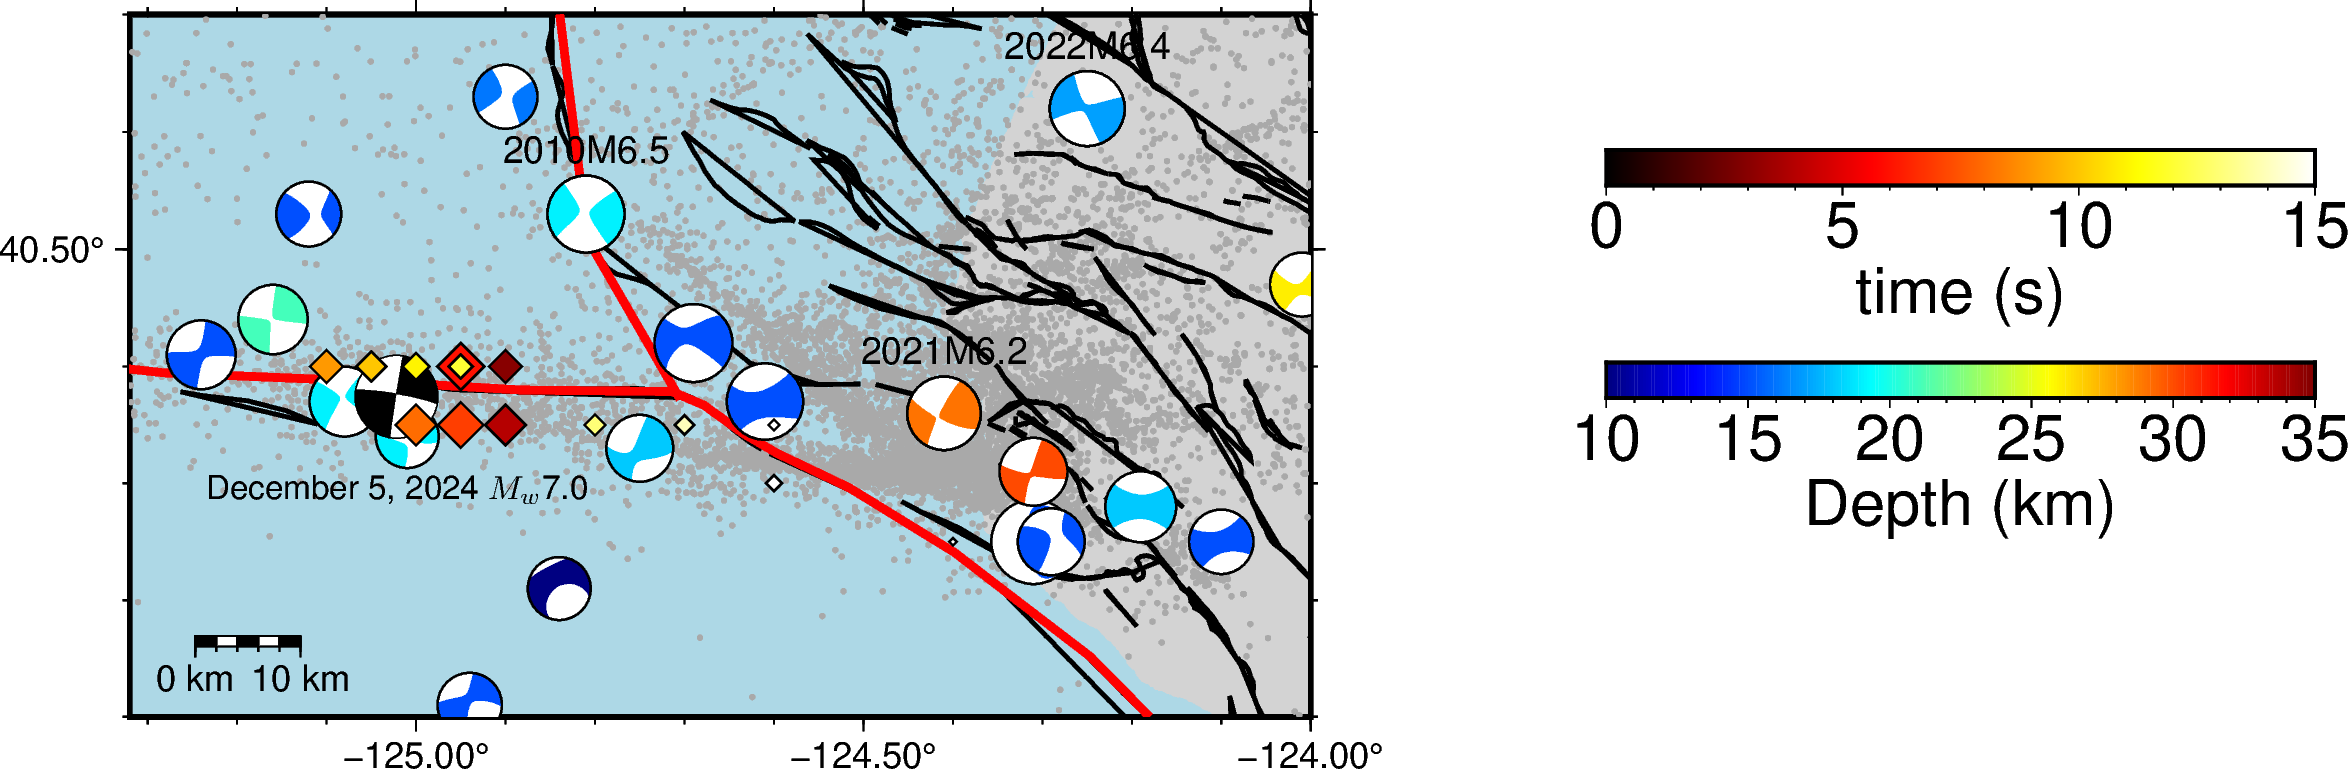

In [32]:
fig = pygmt.Figure()
pygmt.config(FORMAT_GEO_MAP='ddd.xx', MAP_FRAME_TYPE='plain')
region3=[-125.32, -124, 40.1, 40.7]
pygmt.config(FORMAT_GEO_MAP='ddd.xx', MAP_FRAME_TYPE='plain')

fig.coast(
    frame=['WSne', 'xa0.5f0.1', 'ya0.5f0.1'],
    projection=f"M10",
    region=region3,
    land='lightgray',
    water='lightblue'
)


fig.plot(
    x=cat.lon,
    y=cat.lat,
    style="c0.05c",
    fill="darkgray",
    label='Lomax catalog'
)

fig.plot(data='./faults.gmt', pen='1p,black', close=True)
fig.plot(data='./SAF_Men.gmt', pen='2p,red')
fig.plot(data='./cascedia.gmt', pen='2p,red')
fig.meca(spec=cmt_small.iloc[:, 3:], longitude=cmt_small.lon, latitude=cmt_small.lat, scale=0.5, pen='0.5p', convention='mt', depth=cmt_small.depth, cmap='cmt.cpt')
fig.meca(spec=cmt_large.iloc[:, 3:], longitude=cmt_large.lon, latitude=cmt_large.lat, scale=0.5, pen='0.5p', convention='mt', depth=cmt_large.depth, cmap='cmt.cpt', event_name=cmt_large.name)
fig.text(x=-125.15, y=41.3, text='Cascadia Subduction Zone', font='12p,red', angle=-75)
fig.text(x=-124.18, y=39.95, text='SAF', font='12p,red', angle=-75)
fig.plot(x=-123.95, y=39.8, style="v0.5c+ea+r+h0.1+a35", direction=([105], [1.5]), pen="1p,red", fill="red")
fig.plot(x=-124.15, y=40.05, style="v0.5c+ea+r+h0.1+a35", direction=([285], [1.5]), pen="1p,red", fill="red")
fig.text(x=-125.9, y=40.33, text='Mendocino Fault Zone', font='12p,red', angle=0)

focal_mechanism = [
    [280, 84, -179, 189, 89, -6, 4.028, 19]  # Single event
]

# Create a DataFrame to pass to pygmt.meca
focal_df = pd.DataFrame(focal_mechanism, columns=["strike1", "dip1", "rake1", "strike2", "dip2", "rake2", "mantissa", "exponent"])

# Event information (longitude, latitude, depth) and location for beachball
event_data = pd.DataFrame({
    "longitude": [-125.022],
    "latitude": [40.374],
    "depth": [10.0]
})

# Add the focal mechanism DataFrame to the event DataFrame
event_data = pd.concat([event_data, focal_df], axis=1)

# Plot the beachball using GCMT convention
fig.meca(spec=event_data, scale="1.5c", offset=True) 
fig.text(x=-125.022, y=40.345, text='December 5, 2024 @[M_{w}@[7.0', font='8p', angle=0, offset='0/-0.5c')


fig.plot(x=-126.15, y=40.38, style="v0.5c+ea+r+h0.1+a35", direction=([0], [1.5]), pen="1p,red", fill="red")
fig.plot(x=-125.83, y=40.45, style="v0.5c+ea+r+h0.1+a35", direction=([180], [1.5]), pen="1p,red", fill="red")
fig.plot(x=back_projection.lon, y=back_projection.lat, style="dd", size=0.4 * back_projection.beam_power, fill=back_projection.time, cmap='back_projection.cpt', pen='0.5p')
# Add the color bar for depth
with pygmt.config(FONT_LABEL='24p,Helvetica,black', FONT_ANNOT_PRIMARY='24p,Helvetica,black'):
    fig.colorbar(
        cmap='cmt.cpt',  # Use the same colormap as in the mec plot
        position="JBC+w6c/0.3c+o10.5c/-3c",  # Position of the color bar
        frame='af+lDepth (km)'  # Label the color bar
    )
    fig.colorbar(
        cmap='back_projection.cpt',  # Use the same colormap as in the mec plot
        position="JBC+w6c/0.3c+o10.5c/-4.8c",  # Position of the color bar
        frame='af+ltime (s)' # Label the color bar
    )
fig.basemap(map_scale="n0.1/0.1+w10k+f+u")
# # fig.savefig('./figures/fig1.pdf')
fig.show(width=1200)